# Transformations

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
## blurn kernels must add to 1
#blur_kernel = np.ones((3,3),np.float32)/9
#cv2.filter2D(img_edit, -1, blur_kernel)
def ip(img_print):
    if len(img_print.shape) == 2:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print, cmap='gray')
    else:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print[:,:,::-1])
    print(img_print.shape)
    
def hsvp(img_print):
    x =cv2.cvtColor(img_print, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(15,10))
    plt.imshow(x)
    
!ls img

4.png		      day2.jpg	  night3.png  purple-flowers.jpg  thesea.jpg
blue-flowers.jpg      day3.jpg	  night4.jpg  scan.jpg
blue-red-flowers.png  day4.jpg	  noisy.png   seamask.jpg
clean-text.jpg	      night1.jpg  notes.png   sketch.png
day1.jpg	      night2.jpg  n.png       text.png


### Translations

(1600, 2560, 3)


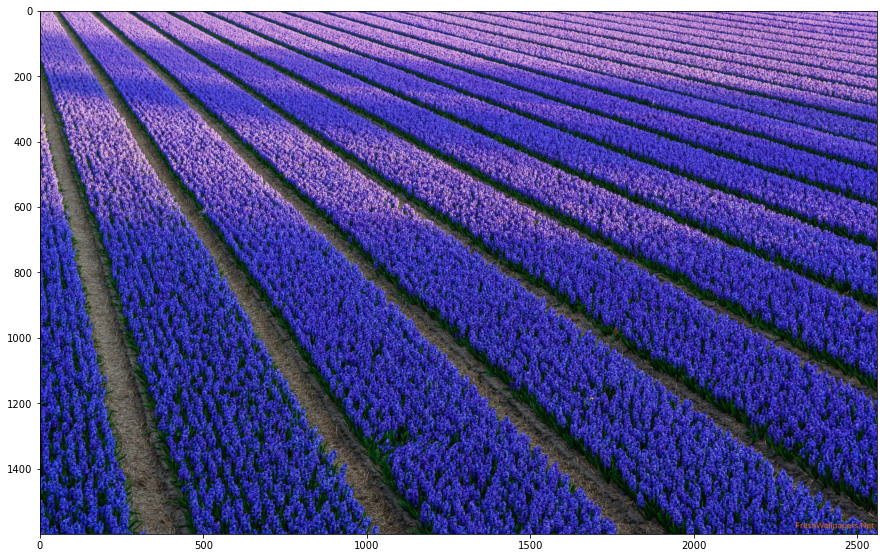

In [49]:
# Load an image
img_flowers = cv2.imread('img/purple-flowers.jpg')
height = img_flowers.shape[0]
width = img_flowers.shape[1]
ip(img_flowers)

In [50]:
# Store the height and width of the image (you will need them later)
print(f"H: {height}, W: {width}")

H: 1600, W: 2560


In [51]:
# Create the translation Matrix
translation_matrix = np.float32([
            [1,0,1280],
            [0,1,800]
])


(1600, 2560, 3)


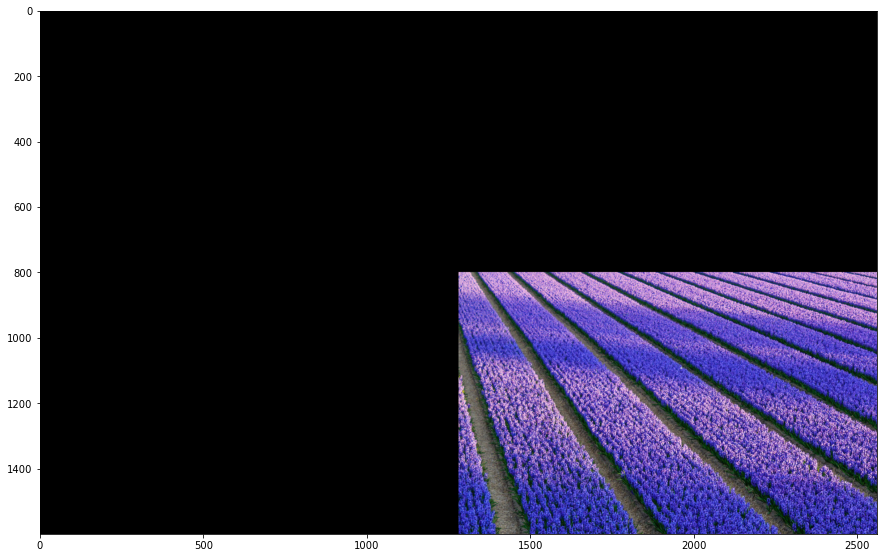

In [52]:
# Apply the translation to the image using cv2.warpAffine and display the new image
moved_img = cv2.warpAffine(img_flowers.copy(), translation_matrix,(width, height))
ip(moved_img)

### Rotation

(1600, 2560, 3)


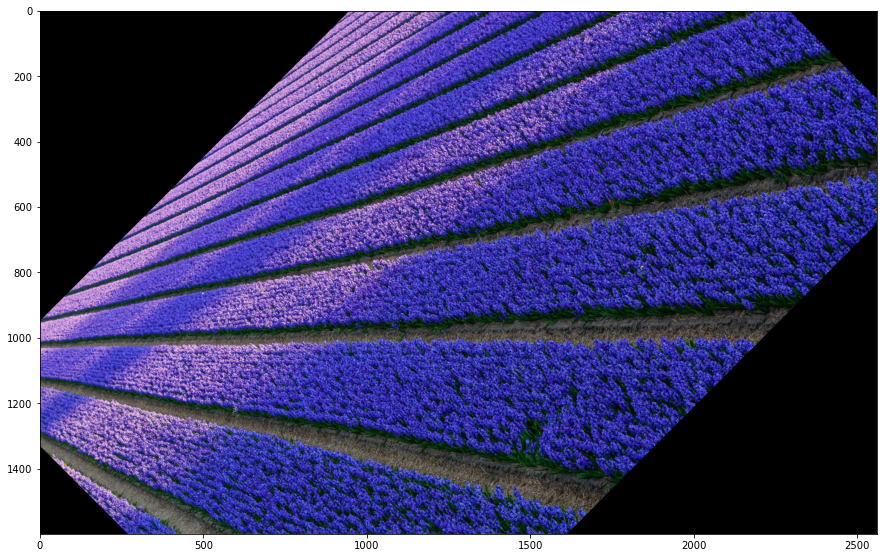

In [53]:
# Load an image

# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point) 
rotation_matrix = cv2.getRotationMatrix2D((width//2,height//2), 45, 1)
rotated_img = cv2.warpAffine(img_flowers.copy(),rotation_matrix,(width, height))
ip(rotated_img)

[Hint](# "cv2.getRotationMatrix2D") 


In [54]:
# Apply the rotation matrix to the image and display the rotated image


### Scaling images

#### Interpolation methods

* INTER_NEAREST - a nearest-neighbor interpolation (Fastest)
* INTER_LINEAR - a bilinear interpolation (used by default) (good for upsampling)
* INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. (Good for downsampling)
* INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood (Better)
* INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood (Best one)

#### Downsampling

(4800, 7680, 3)


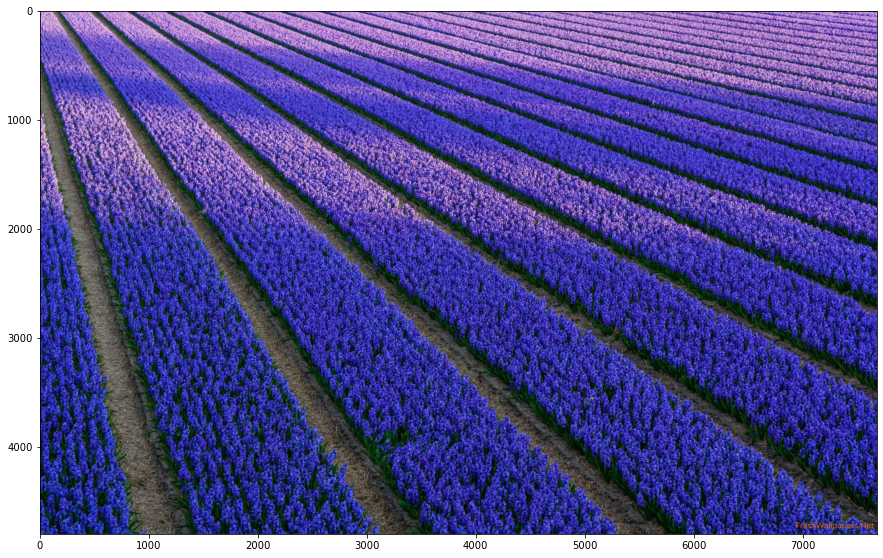

In [59]:
INTER_AREA = cv2.resize(img_flowers.copy(), (width*3, height*3),3,3,cv2.INTER_AREA)
ip(INTER_AREA)

(4800, 7680, 3)


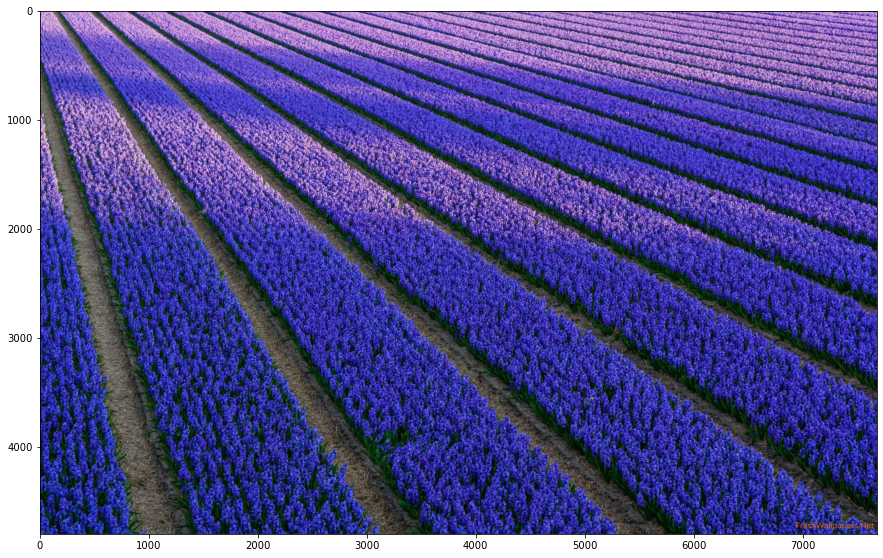

In [60]:
INTER_CUBIC = cv2.resize(img_flowers.copy(), (width*3, height*3),3,3,cv2.INTER_CUBIC)
ip(INTER_CUBIC)

(160, 256, 3)


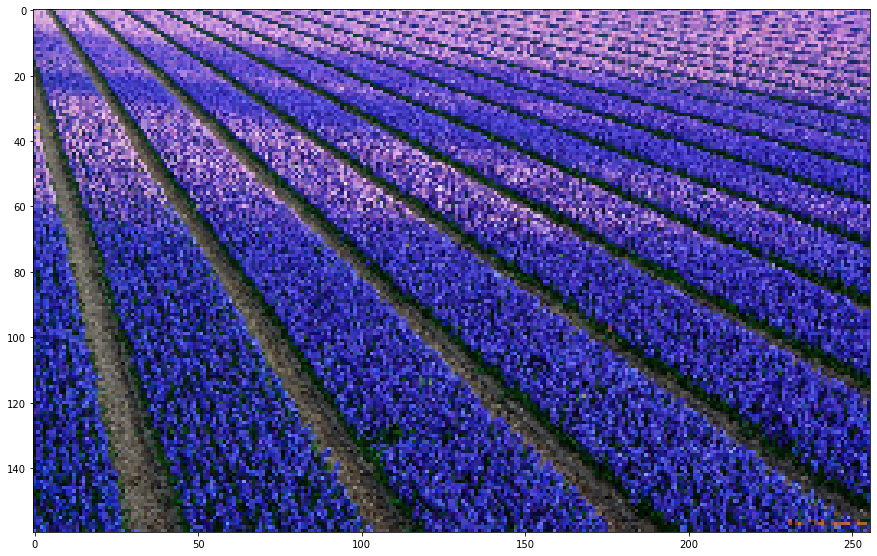

In [65]:
INTER_LANCZOS4 = cv2.resize(img_flowers.copy(), (width//10, height//10),3,3,cv2.INTER_LANCZOS4)
ip(INTER_LANCZOS4)

(160, 256, 3)


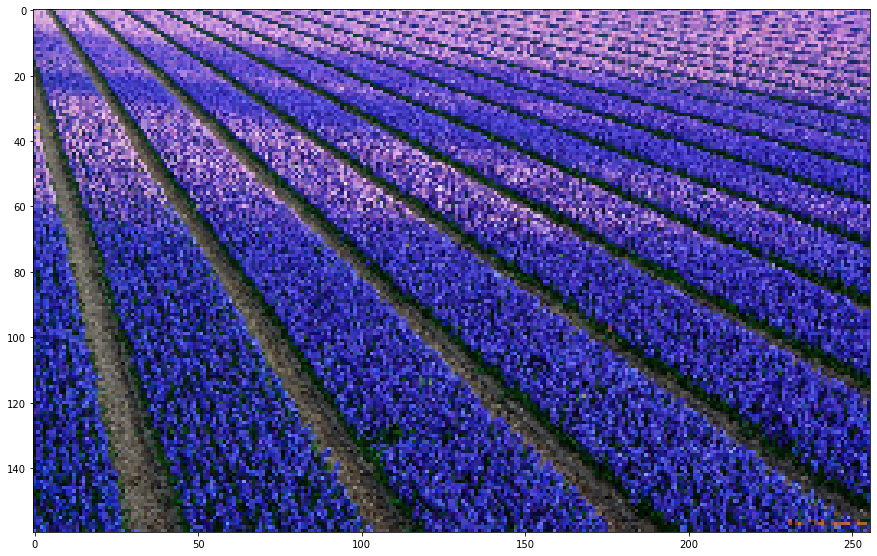

In [64]:
# which one renders the best result?
INTER_LINEAR = cv2.resize(img_flowers.copy(), (width//10, height//10),3,3,cv2.INTER_LINEAR)
ip(INTER_LINEAR)

(160, 256, 3)


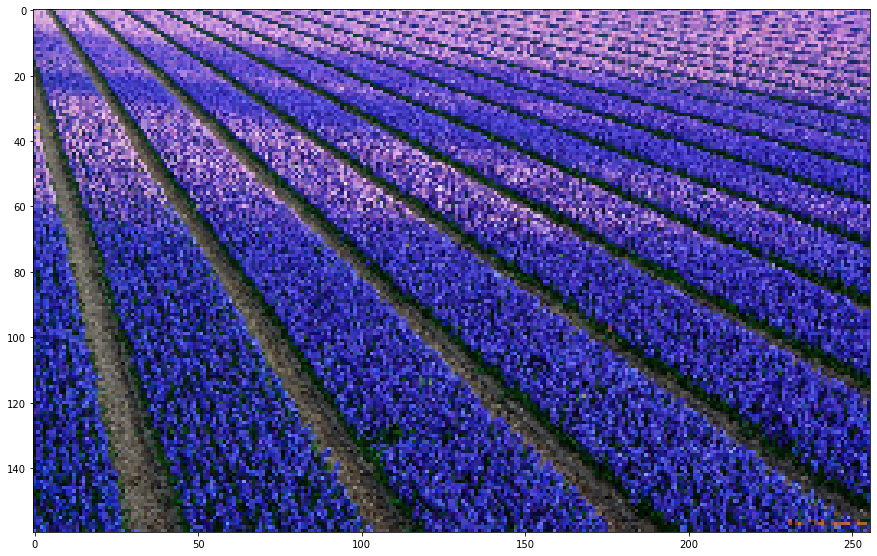

In [67]:
# Load and image and downsample it by half, try all the interpolation methods
# which one renders the best result?
INTER_NEAREST = cv2.resize(img_flowers.copy(), (width//10, height//10),3,3,cv2.INTER_NEAREST)
ip(INTER_NEAREST)

[Hint](# "cv2.resize") 

#### Upsampling

In [ ]:
# Load and image and upsample it by double its size, try all the interpolation methods 
# which one renders the best result?

INTER_NEAREST_up = cv2.resize(INTER_NEAREST.copy(), (width*10, height*10),3,3,cv2.INTER_NEAREST)
ip(INTER_NEAREST_up)

(16000, 25600, 3)
